<a href="https://colab.research.google.com/github/vardanagarwal/crowd_counting/blob/master/ShanghaiTech_Crowd_Count_Ground_truth_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
zf = zipfile.ZipFile('/content/drive/My Drive/ShanghaiTech_Crowd_Counting_Dataset.zip', "r")
zf.extractall()

In [0]:
import h5py
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io as io
import glob
from tqdm import tqdm
import os
import numpy as np

In [66]:
part_A_train = 'part_A_final/train_data/ground_truth'
part_B_train = 'part_B_final/train_data/ground_truth'
path_sets = [part_A_train, part_B_train]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.mat')):
        img_paths.append(img_path)
print(len(img_paths))

700


In [67]:
df = []
for img_path in tqdm(img_paths):
    mat = io.loadmat(img_path)    
    real = mat["image_info"][0,0][0,0][1][0][0]
    file_path = img_path.replace('.mat','.h5').replace('ground_truth','ground').replace('GT_IMG', 'IMG')
    file_path = os.path.join('drive/My Drive/ShanghaiTech_h5', file_path) 
    gt_file = h5py.File(file_path,'r')
    groundtruth = np.asarray(gt_file['density'])
    got = np.sum(groundtruth)
    df.append((real, got))

100%|██████████| 700/700 [00:04<00:00, 164.88it/s]


In [0]:
train = pd.DataFrame(df, columns=('true', 'pred'))

In [54]:
part_A_test = 'part_A_final/test_data/ground_truth'
part_B_test = 'part_B_final/test_data/ground_truth'
path_sets = [part_A_test, part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.mat')):
        img_paths.append(img_path)
print(len(img_paths))

498


In [55]:
df = []
for img_path in tqdm(img_paths):
    mat = io.loadmat(img_path)    
    real = mat["image_info"][0,0][0,0][1][0][0]
    file_path = img_path.replace('.mat','.h5').replace('ground_truth','ground').replace('GT_IMG', 'IMG')
    file_path = os.path.join('drive/My Drive/ShanghaiTech_h5', file_path) 
    gt_file = h5py.File(file_path,'r')
    groundtruth = np.asarray(gt_file['density'])
    got = np.sum(groundtruth)
    df.append((real, got))

100%|██████████| 498/498 [00:03<00:00, 165.49it/s]


In [0]:
test = pd.DataFrame(df, columns=('true', 'pred'))

In [70]:
test

,true,pred
0,93,88.893356
1,429,426.908142
2,72,68.211365
3,760,757.570068
4,397,392.495697
...,...,...
493,111,103.047050
494,51,46.697617
495,73,70.316360
496,200,189.710571


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train = train['pred'].values.reshape(-1, 1)
y_train = train['true']
X_test = test['pred'].values.reshape(-1, 1)
y_test = test['true']
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
before_reg = mean_absolute_error(np.array(y_test),np.array(X_test))
after_reg = mean_absolute_error(np.array(y_test),np.array(y_pred))

In [75]:
print('MAE before regression =', before_reg)
print('MAE after regression =', after_reg)

MAE before regression = 4.297796846872353
MAE after regression = 1.8987950361959476


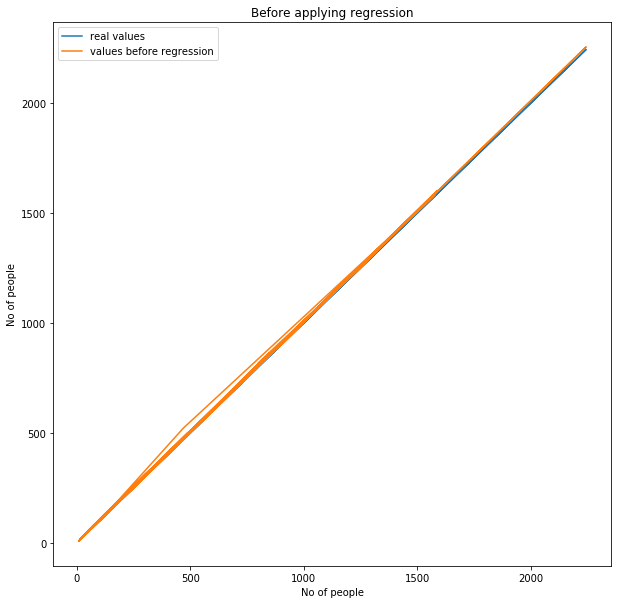

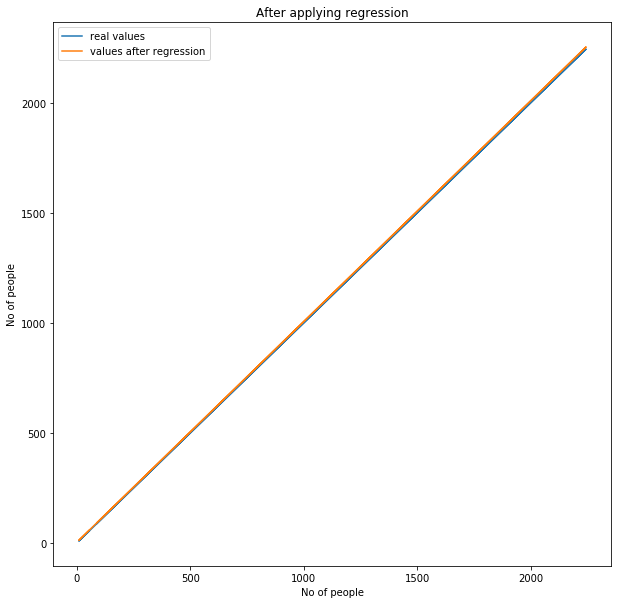

In [94]:
plt.figure(figsize=(10 ,10))
plt.plot(X_test, X_test, label='real values')
plt.plot(X_test, y_test, label='values before regression')
plt.legend()
plt.xlabel('No of people')
plt.ylabel('No of people')
plt.title('Before applying regression')
plt.figure(figsize=(10 ,10))
plt.plot(X_test, X_test, label='real values')
plt.plot(X_test, y_pred, label='values after regression')
plt.legend()
plt.xlabel('No of people')
plt.ylabel('No of people')
plt.title('After applying regression')
plt.show()

In [0]:
import pickle
Pkl_Filename = "drive/My Drive/regression.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)

In [77]:
Pkl_Filename = "drive/My Drive/regression.pkl"  
with open(Pkl_Filename, 'rb') as file:  
    regressor = pickle.load(file)

regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)